# Hausdorff distance

## Theory

**Hausdorff Distance**


## Load dependencies

In [2]:
import pandas as pd
import numpy as np
import copy

from scipy import stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.cluster import DBSCAN

In [5]:
from msci.utils import utils
from msci.analysis.networks import *
from msci.utils.plot import create_count_of_shoppers_gif, create_count_of_shoppers_image
from msci.utils.plot import plot_path_jn

In [6]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

In [7]:
from msci.analysis.complexity import pairwise_haussdorf_fast, position_dictionary, matrix_correlation

## Import raw data

In [8]:
signal_df = utils.import_signals('Mall of Mauritius', version=3, signal_type=1)

In [9]:
from msci.cleaning.store_ids import clean_store_id

In [10]:
cleaner_signal_df = clean_store_id(signal_df[signal_df.store_id.notnull()])

HBox(children=(IntProgress(value=0, max=266), HTML(value='')))

## Get data

In [47]:
analysis_mac_addresses = sorted(cleaner_signal_df.mac_address.unique().tolist()[:100] + cleaner_signal_df.mac_address.unique().tolist()[5000:5200])

pos_dict = position_dictionary(
    cleaner_signal_df[cleaner_signal_df.mac_address.isin(analysis_mac_addresses)].sort_values('mac_address'), 
    list_type=True
)

In [48]:
from scipy.spatial.distance import directed_hausdorff

In [49]:
haus = np.empty((len(pos_dict),len(pos_dict),))
haus[:] = np.nan

for i in tqdm(range(len(pos_dict))):
    for j in range(len(pos_dict)):
        haus[i][j] = directed_hausdorff(pos_dict[i], pos_dict[j])[0]

HBox(children=(IntProgress(value=0, max=300), HTML(value='')))

In [50]:
X = haus

## DBScan clustering

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
X = StandardScaler().fit_transform(X)

In [68]:
db = DBSCAN(eps=7).fit(X)

In [69]:
labels = db.labels_

## Plots

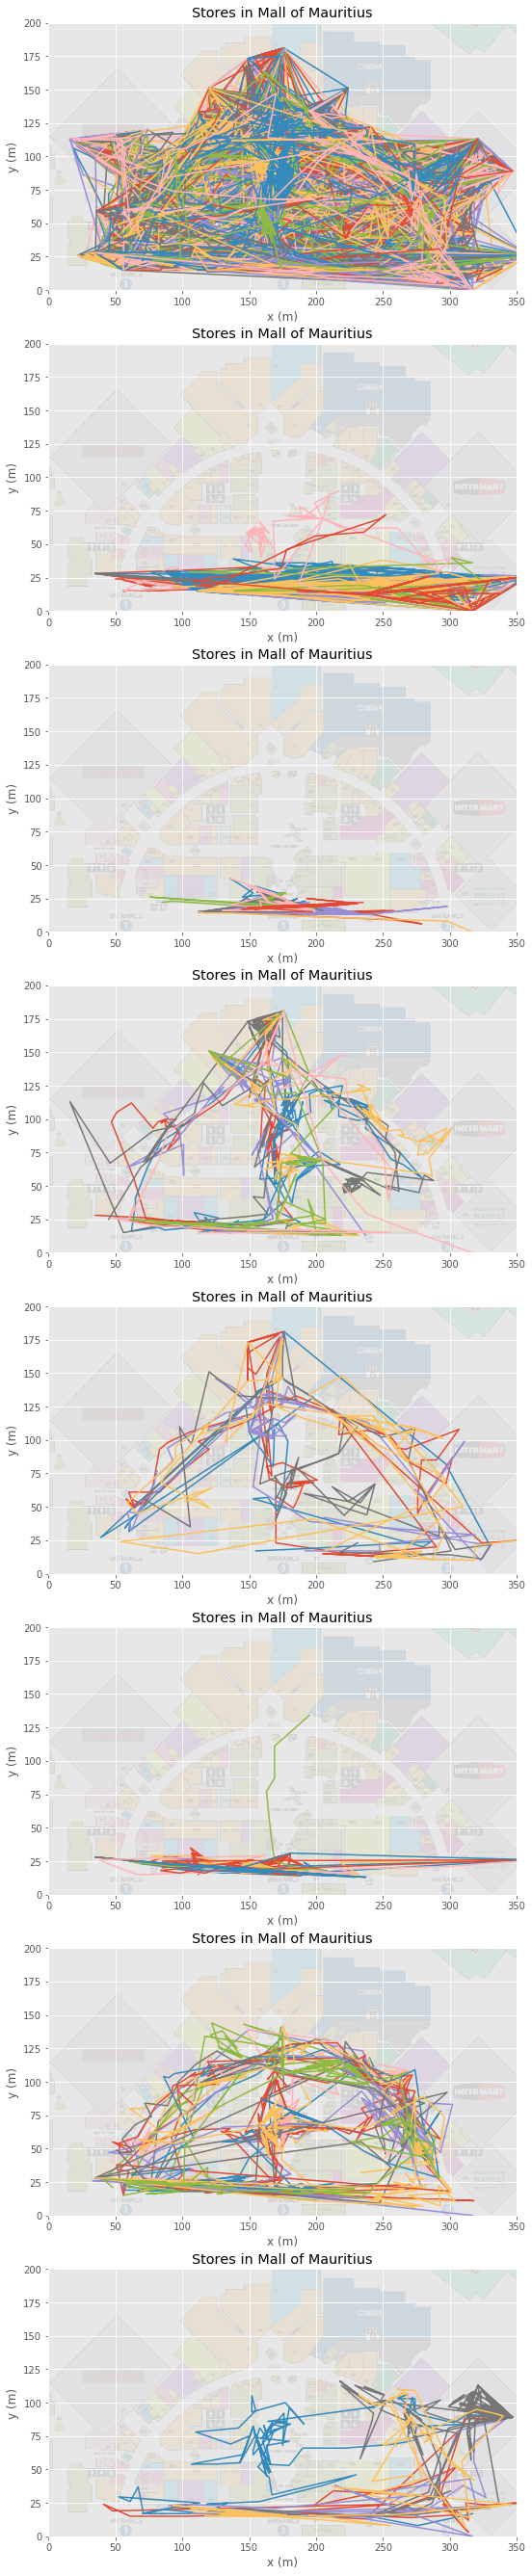

In [71]:
num_plots = max(labels) + 2

fig, ax = plt.subplots(nrows=num_plots, ncols=1, figsize=(16, 6 * num_plots))

for i in range(num_plots):
    plot_path_jn(
        signal_df, 
        list(np.array(analysis_mac_addresses)[np.where(labels==i-1)]), 
        axes=ax[i], 
        scatter=False, 
        label=False
    )